In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
filepath=r'C:\Users\parim\Downloads\mushrooms.csv'
df=pd.read_csv(filepath)

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
X=df.drop('class',axis=1)

In [6]:
X=pd.get_dummies(X,drop_first=True)

In [7]:
y=df['class']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=101)

In [12]:
from sklearn.ensemble import GradientBoostingClassifier#meta learning algorithm but they perform best with decision tree

In [13]:
from sklearn.model_selection import GridSearchCV

In [16]:
param_grid={'n_estimators':[50,100],'learning_rate':[0.1,0.05,0.2],'max_depth':[3,4,5]}

In [17]:
gb_model=GradientBoostingClassifier()

In [18]:
grid=GridSearchCV(gb_model,param_grid)

In [19]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [20]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [21]:
predictions=grid.predict(X_test)

In [22]:
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [23]:
grid.best_estimator_

GradientBoostingClassifier()

In [24]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [25]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [26]:
grid.best_estimator_.feature_importances_

array([2.91150176e-04, 1.87664444e-16, 0.00000000e+00, 0.00000000e+00,
       6.86100715e-17, 1.04524302e-03, 2.36743895e-17, 5.06011038e-06,
       0.00000000e+00, 0.00000000e+00, 3.42057672e-17, 0.00000000e+00,
       8.03239495e-18, 0.00000000e+00, 0.00000000e+00, 5.71685316e-07,
       2.31053911e-03, 5.16350053e-02, 6.24175887e-04, 1.01380190e-02,
       1.82499853e-02, 1.03644631e-05, 6.14744334e-01, 3.94907433e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.25092906e-02,
       1.05123612e-02, 0.00000000e+00, 1.25750562e-16, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.57905100e-17,
       2.24537525e-16, 0.00000000e+00, 4.36375014e-17, 0.00000000e+00,
       1.18312069e-05, 4.28532604e-04, 1.35994572e-01, 4.69032068e-03,
       4.03153100e-02, 4.64723214e-04, 6.12113083e-06, 4.95063766e-06,
       0.00000000e+00, 0.00000000e+00, 2.58201954e-02, 3.31973885e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [27]:
feat_import=grid.best_estimator_.feature_importances_

In [28]:
imp_feat=pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])

In [30]:
imp_feat=imp_feat[imp_feat['Importance']>0.0005]

In [31]:
imp_feat

,Importance
cap-surface_g,0.001045
cap-color_y,0.002311
bruises_t,0.051635
odor_c,0.000624
odor_f,0.010138
odor_l,0.018250
odor_n,0.614744
odor_p,0.003949
gill-spacing_w,0.012509
gill-size_n,0.010512


In [33]:
imp_feat=imp_feat.sort_values('Importance')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, 'odor_c'),
  Text(1, 0, 'population_y'),
  Text(2, 0, 'stalk-color-below-ring_w'),
  Text(3, 0, 'population_v'),
  Text(4, 0, 'cap-surface_g'),
  Text(5, 0, 'ring-type_p'),
  Text(6, 0, 'population_c'),
  Text(7, 0, 'stalk-color-above-ring_w'),
  Text(8, 0, 'cap-color_y'),
  Text(9, 0, 'stalk-color-below-ring_y'),
  Text(10, 0, 'ring-number_o'),
  Text(11, 0, 'spore-print-color_w'),
  Text(12, 0, 'stalk-color-above-ring_c'),
  Text(13, 0, 'odor_p'),
  Text(14, 0, 'spore-print-color_u'),
  Text(15, 0, 'stalk-root_e'),
  Text(16, 0, 'odor_f'),
  Text(17, 0, 'gill-size_n'),
  Text(18, 0, 'spore-print-color_h'),
  Text(19, 0, 'gill-spacing_w'),
  Text(20, 0, 'odor_l'),
  Text(21, 0, 'stalk-surface-below-ring_y'),
  Text(22, 0, 'spore-print-color_r'),
  Text(23, 0, 'stalk-root_r'),
  Text(24, 0, 'bruises_t'),
  Text(25, 0, 'sta

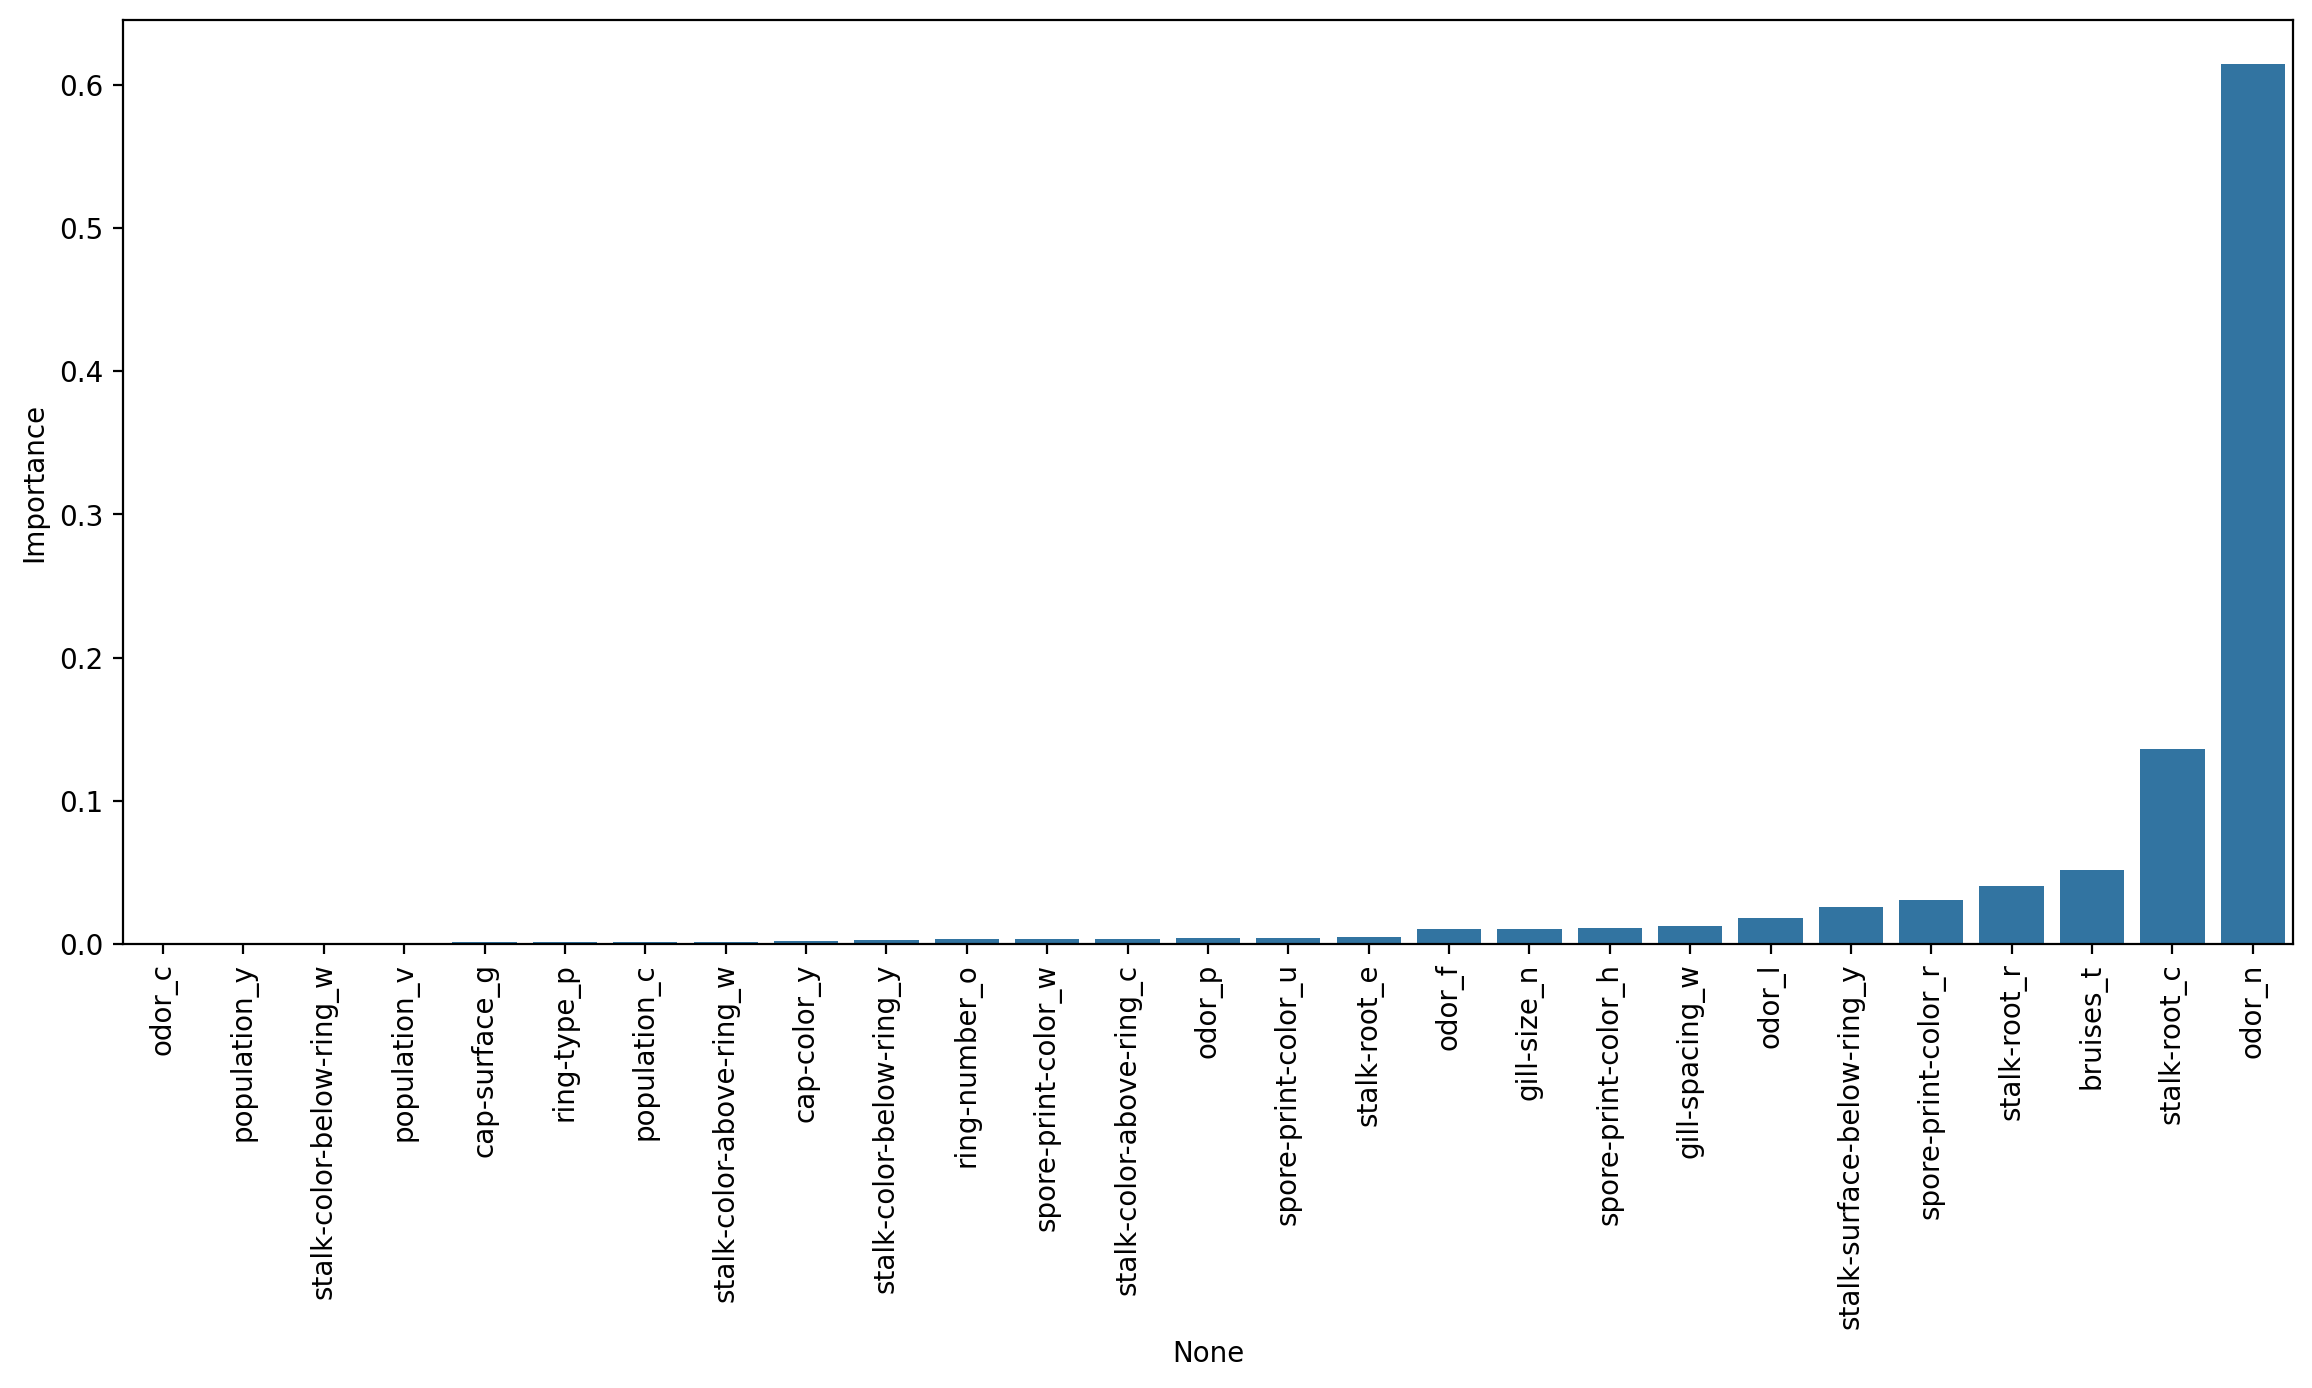

In [36]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feat,x=imp_feat.index,y='Importance')
plt.xticks(rotation=90)